# 課題6: ディープラーニングのモデルを構築しよう

今回の課題では手書き数字の認識を、CNNを用いて行います。ただし本課題では、レッスン本編で用いたscikit-learnのものではなく、Kerasのデータセットに含まれている、より大きいサイズの手書き数字データで課題を進めていただきます。

下記にKerasから手書き数字のデータセットをダウンロードするコードが記載されています。このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルにコードを埋めていってください。

（※`変更しないでください`と書かれたセルには、コードの追記変更をしないでください）

## 1. ライブラリのimport

In [1]:
# （変更しないでください）

# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読み込み

Kerasのデータセットは、あらかじめTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [2]:
# Kerasに添付されている手書き数字のデータセットをダウンロードして読み込む
# （変更しないでください）
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

## 3. データの確認

In [5]:
# X_train, Y_train, X_test, Y_testの形状を確認
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


In [6]:
# X_trainの先頭1行を表示
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# Y_trainの先頭1行を表示
Y_train[0]

np.uint8(5)

データセットを可視化して表示します。

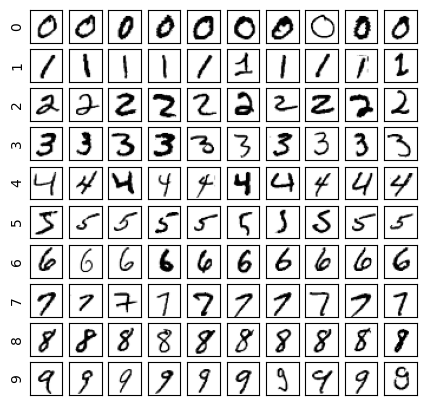

In [8]:
# （変更しないでください）

# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [9]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)

In [10]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
Y_train2 = tf.keras.utils.to_categorical(Y_train)

# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = tf.keras.utils.to_categorical(Y_test)

In [11]:
# X_train2, Y_train2, X_test2, Y_test2の形状を確認
print("X_train2:", X_train2.shape)
print("Y_train2:", Y_train2.shape)
print("X_test2:", X_test2.shape)
print("Y_test2:", Y_test2.shape)

X_train2: (60000, 28, 28, 1)
Y_train2: (60000, 10)
X_test2: (10000, 28, 28, 1)
Y_test2: (10000, 10)


In [13]:
# train_test_splitを使い、学習データと検証データに7:3（検証データが3割）で分割する
# （詳細：データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割）
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train2, Y_train2, test_size=0.3, random_state=0)

In [14]:
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
print("X_train2:", X_train2.shape)
print("Y_train2:", Y_train2.shape)
print("X_valid2:", X_valid2.shape)
print("Y_valid2:", Y_valid2.shape)
print("X_test2:", X_test2.shape)
print("Y_test2:", Y_test2.shape)

X_train2: (42000, 28, 28, 1)
Y_train2: (42000, 10)
X_valid2: (18000, 28, 28, 1)
Y_valid2: (18000, 10)
X_test2: (10000, 28, 28, 1)
Y_test2: (10000, 10)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします：

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜、パラメータ数を調整して行なってください。

In [19]:
# （モデルの初期化から構築までのコードを、このセル以下に記述してください）
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# モデルの構造を表示
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,530 (466.91 KB)

 Trainable params: 119,530 (466.91 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
%%time
# 学習の実施(ものすごく時間がかかる場合もあります)
log = model.fit(X_train2, Y_train2, epochs=50, batch_size=64, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=10,
                                                            verbose=1)],
                validation_data=(X_valid2, Y_valid2))

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1651 - loss: 2.5026 - val_accuracy: 0.7728 - val_loss: 1.0143
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4328 - loss: 1.4261 - val_accuracy: 0.8960 - val_loss: 0.6003
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4626 - loss: 1.3370 - val_accuracy: 0.9126 - val_loss: 0.5466
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4722 - loss: 1.3082 - val_accuracy: 0.9069 - val_loss: 0.5730
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4840 - loss: 1.2998 - val_accuracy: 0.9181 - val_loss: 0.5851
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4851 - loss: 1.3107 - val_accuracy: 0.9278 - val_loss: 0.5455
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4906 - loss: 1.3021 - val_accuracy: 0.9426 - val_loss: 0.4618
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4873 - loss: 1.3180 - 

Text(0, 0.5, 'crossentropy')

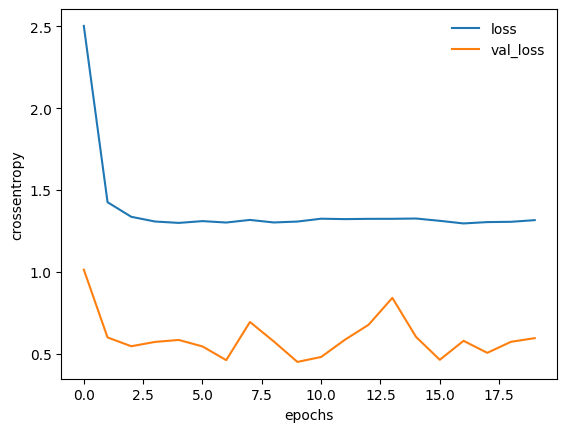

In [22]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [23]:
# predictを使い、X_test2をもとに予測した結果を、
# カテゴリー変数へ復元してY_pred2に代入
Y_pred2 = np.argmax(model.predict(X_test2), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
# Y_test2もカテゴリー変数へ復元して、Y_test2_ に代入
Y_test2_ = np.argmax(Y_test2, axis=1)

In [26]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report
print(classification_report(Y_test2_, Y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       980
           1       0.98      0.93      0.95      1135
           2       0.98      0.91      0.94      1032
           3       0.75      0.98      0.85      1010
           4       0.89      0.96      0.92       982
           5       0.99      0.72      0.83       892
           6       0.94      0.92      0.93       958
           7       0.99      0.90      0.94      1028
           8       0.66      0.98      0.79       974
           9       0.95      0.80      0.87      1009

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.89     10000
weighted avg       0.91      0.89      0.89     10000

